In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
data_path = "../data/raw_analyst_ratings.csv"
df = pd.read_csv(data_path)
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [ ]:
# Summary statistics
df.info()
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Preview basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype                    
---  ------      --------------    -----                    
 0   Unnamed: 0  1407328 non-null  int64                    
 1   headline    1407328 non-null  object                   
 2   url         1407328 non-null  object                   
 3   publisher   1407328 non-null  object                   
 4   date        55987 non-null    datetime64[ns, UTC-04:00]
 5   stock       1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 64.4+ MB
Missing values:
 Unnamed: 0          0
headline            0
url                 0
publisher           0
date          1351341
stock               0
dtype: int64


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [20]:
from collections import Counter
from wordcloud import WordCloud

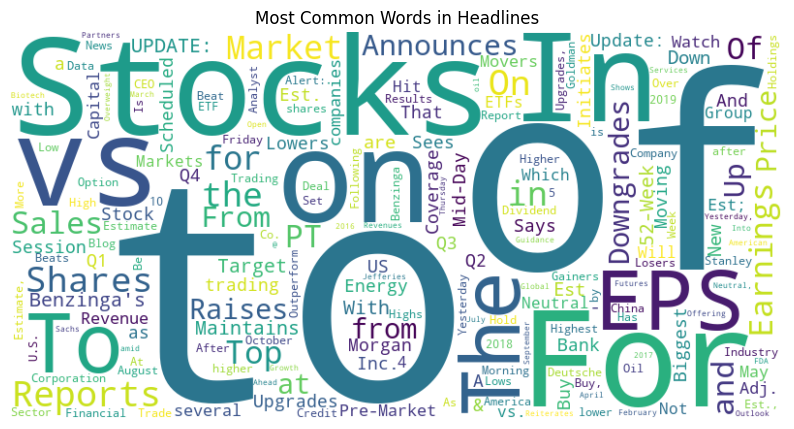

In [21]:

# Tokenize and count word frequencies
word_counts = Counter(" ".join(df['headline']).split())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Headlines')
plt.show()

C:\Users\lemlem\AppData\Local\Temp\ipykernel_14292\3584691658.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_df, palette='viridis')


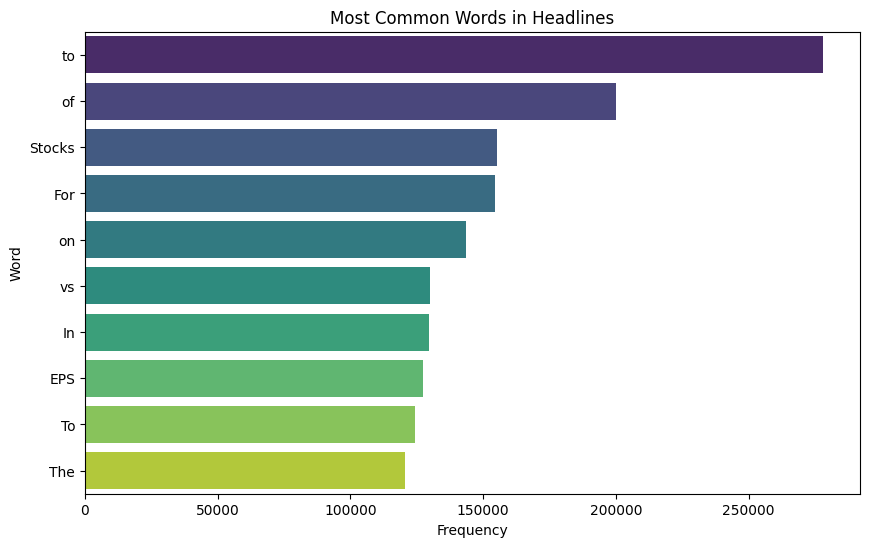

In [22]:
import seaborn as sns
# Tokenize and count word frequencies
word_counts = Counter(" ".join(df['headline']).split())

# Get the 10 most common words
common_words = word_counts.most_common(10)

# Create a DataFrame for Seaborn plotting
import pandas as pd
word_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_df, palette='viridis')
plt.title('Most Common Words in Headlines')
plt.show()

In [ ]:
#Headline Analysis

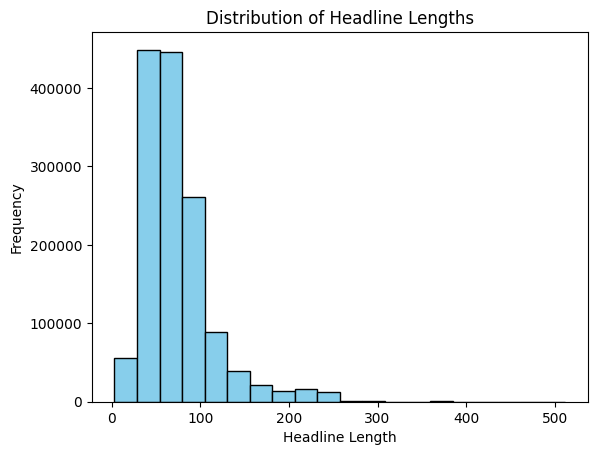

In [4]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

# Plot headline lengths
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.show()

In [8]:
print(df['date'].head())
print(df['date'].dtype)

0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
object


In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


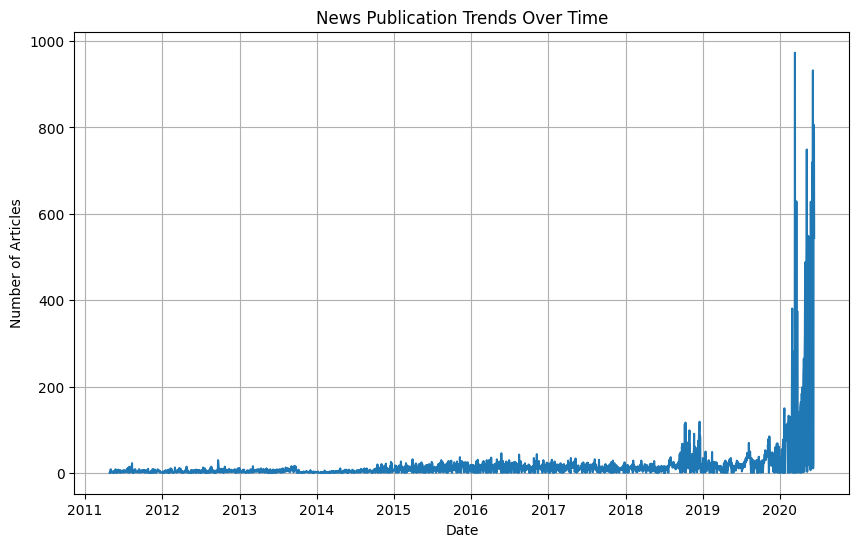

In [10]:
df['date'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('News Publication Trends Over Time')
plt.grid()
plt.show()

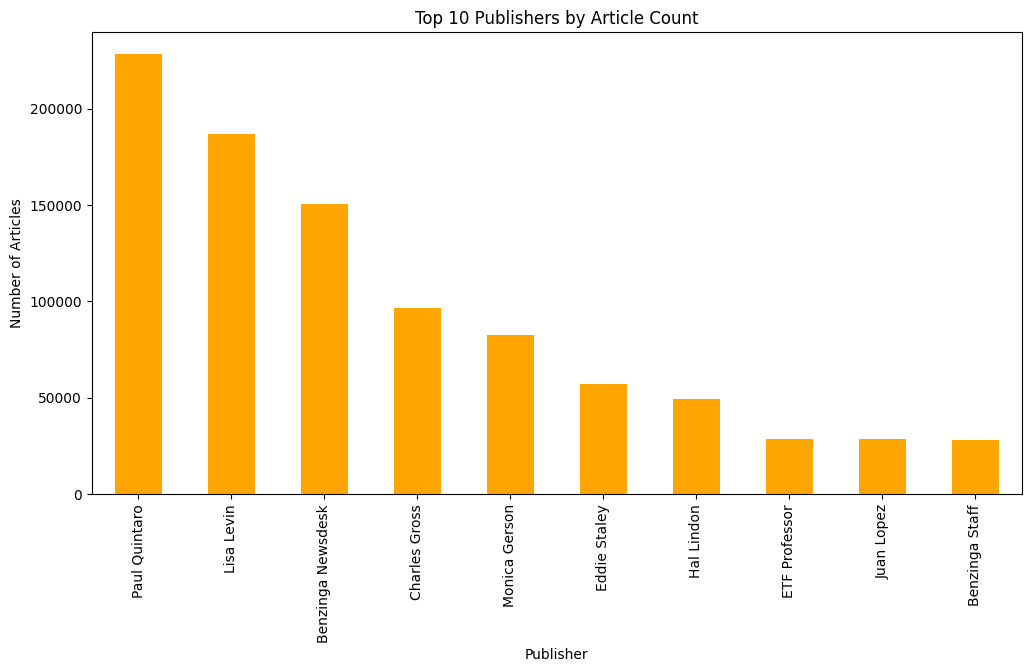

In [11]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

# Top 10 publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [23]:
print(df['publisher'].value_counts())

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [ ]:
#Text Analysis (Sentiment)


In [25]:
from textblob import TextBlob

df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[['headline', 'sentiment']].head(20))

                                             headline  sentiment
0             Stocks That Hit 52-Week Highs On Friday       0.00
1          Stocks That Hit 52-Week Highs On Wednesday       0.00
2                       71 Biggest Movers From Friday       0.00
3        46 Stocks Moving In Friday's Mid-Day Session       0.00
4   B of A Securities Maintains Neutral on Agilent...       0.00
5   CFRA Maintains Hold on Agilent Technologies, L...       0.00
6   UBS Maintains Neutral on Agilent Technologies,...       0.00
7   Agilent Technologies shares are trading higher...       0.25
8   Wells Fargo Maintains Overweight on Agilent Te...       0.00
9          10 Biggest Price Target Changes For Friday       0.00
10    30 Stocks Moving in Friday's Pre-Market Session       0.00
11  SVB Leerink Maintains Outperform on Agilent Te...       0.00
12  8 Stocks Moving In Thursday's After-Hours Session       0.00
13  Agilent Technologies shares are trading higher...       0.25
14  Agilent Technologies 